In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv(folder + '/Data/cancer patient data sets.csv')

# Tiền xử lý dữ liệu


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
print('Trong data, độ tuổi lớn nhất là ',data['Age'].max(),' và dộ tuổi nhỏ nhất là ',data['Age'].min())

Trong data, độ tuổi lớn nhất là  73  và dộ tuổi nhỏ nhất là  14


In [ ]:
a = data.drop(['Age','index','Patient Id'],axis = 1)
for i in a:
  j = data[i].unique().tolist()
  print('Danh sách ',i,' trong data', j)

Danh sách  Gender  trong data [1, 2]
Danh sách  Air Pollution  trong data [2, 3, 4, 7, 6, 5, 1, 8]
Danh sách  Alcohol use  trong data [4, 1, 5, 7, 8, 3, 6, 2]
Danh sách  Dust Allergy  trong data [5, 6, 7, 4, 2, 8, 1, 3]
Danh sách  OccuPational Hazards  trong data [4, 3, 5, 7, 2, 6, 8, 1]
Danh sách  Genetic Risk  trong data [3, 4, 5, 6, 7, 2, 1]
Danh sách  chronic Lung Disease  trong data [2, 4, 7, 6, 3, 5, 1]
Danh sách  Balanced Diet  trong data [2, 6, 7, 4, 5, 3, 1]
Danh sách  Obesity  trong data [4, 2, 7, 3, 5, 6, 1]
Danh sách  Smoking  trong data [3, 2, 7, 8, 1, 6, 5, 4]
Danh sách  Passive Smoker  trong data [2, 4, 3, 7, 6, 8, 5, 1]
Danh sách  Chest Pain  trong data [2, 4, 7, 3, 6, 5, 9, 8, 1]
Danh sách  Coughing of Blood  trong data [4, 3, 8, 9, 1, 5, 7, 6, 2]
Danh sách  Fatigue  trong data [3, 1, 8, 4, 5, 9, 2, 6]
Danh sách  Weight Loss  trong data [4, 3, 7, 2, 6, 5, 1, 8]
Danh sách  Shortness of Breath  trong data [2, 7, 9, 3, 4, 5, 6, 1]
Danh sách  Wheezing  trong data [2, 8, 1,

In [ ]:
data = data.drop(['index','Patient Id'], axis = 1)

In [ ]:
map = {'Low': 1,'Medium': 2,'High': 3}
data['Level'] = data['Level'].map(map)

In [ ]:
age=data['Age']
a = pd.qcut(data['Age'], 4, labels = ["14-28", "29-43", "44-58", "59-73"])
data['Age'] = a
data.rename(columns = {'Age': 'Age Group'}, inplace=True)

In [ ]:
map = {'14-28': 1,'29-43': 2,'44-58': 3, '59-73': 4}
data['Age Group'] = data['Age Group'].map(map).astype('int64')

In [ ]:
data2=data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age Group                 1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [ ]:
data

,Age Group,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,2,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,1,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,3,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,4,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,3,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,1,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,1,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


# Trực quan đơn biến

#**I Trực quan biến thuộc tính**

##1.Trực quan biến định lượng

Text(0.5, 1.0, 'Phân phối của biến Age')

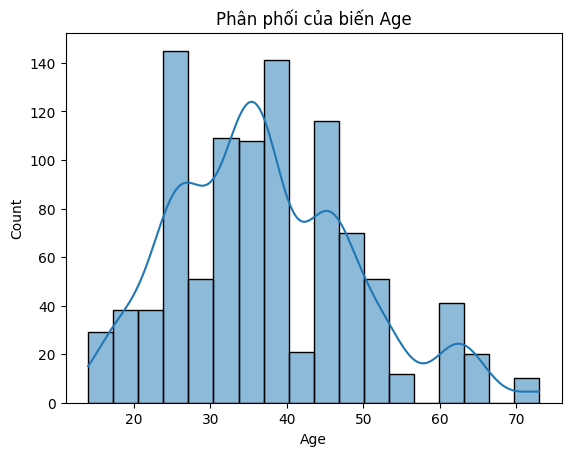

In [ ]:
sns.histplot(age, kde=True)
plt.title('Phân phối của biến Age')

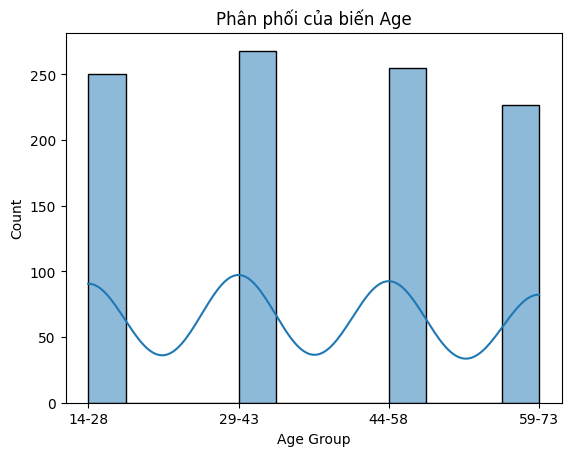

In [ ]:
tick_labels = ['14-28', '29-43', '44-58', '59-73']

# Vẽ histogram và
sns.histplot(data['Age Group'], kde=True)
plt.title('Phân phối của biến Age')
# Thay đổi tên các cột xuất hiện trên trục x
plt.gca().set_xticks([1, 2, 3, 4])  # Đặt vị trí của ticks
plt.gca().set_xticklabels(tick_labels)  # Đặt nhãn cho ticks

plt.show()

##2.Trực quan biến định danh

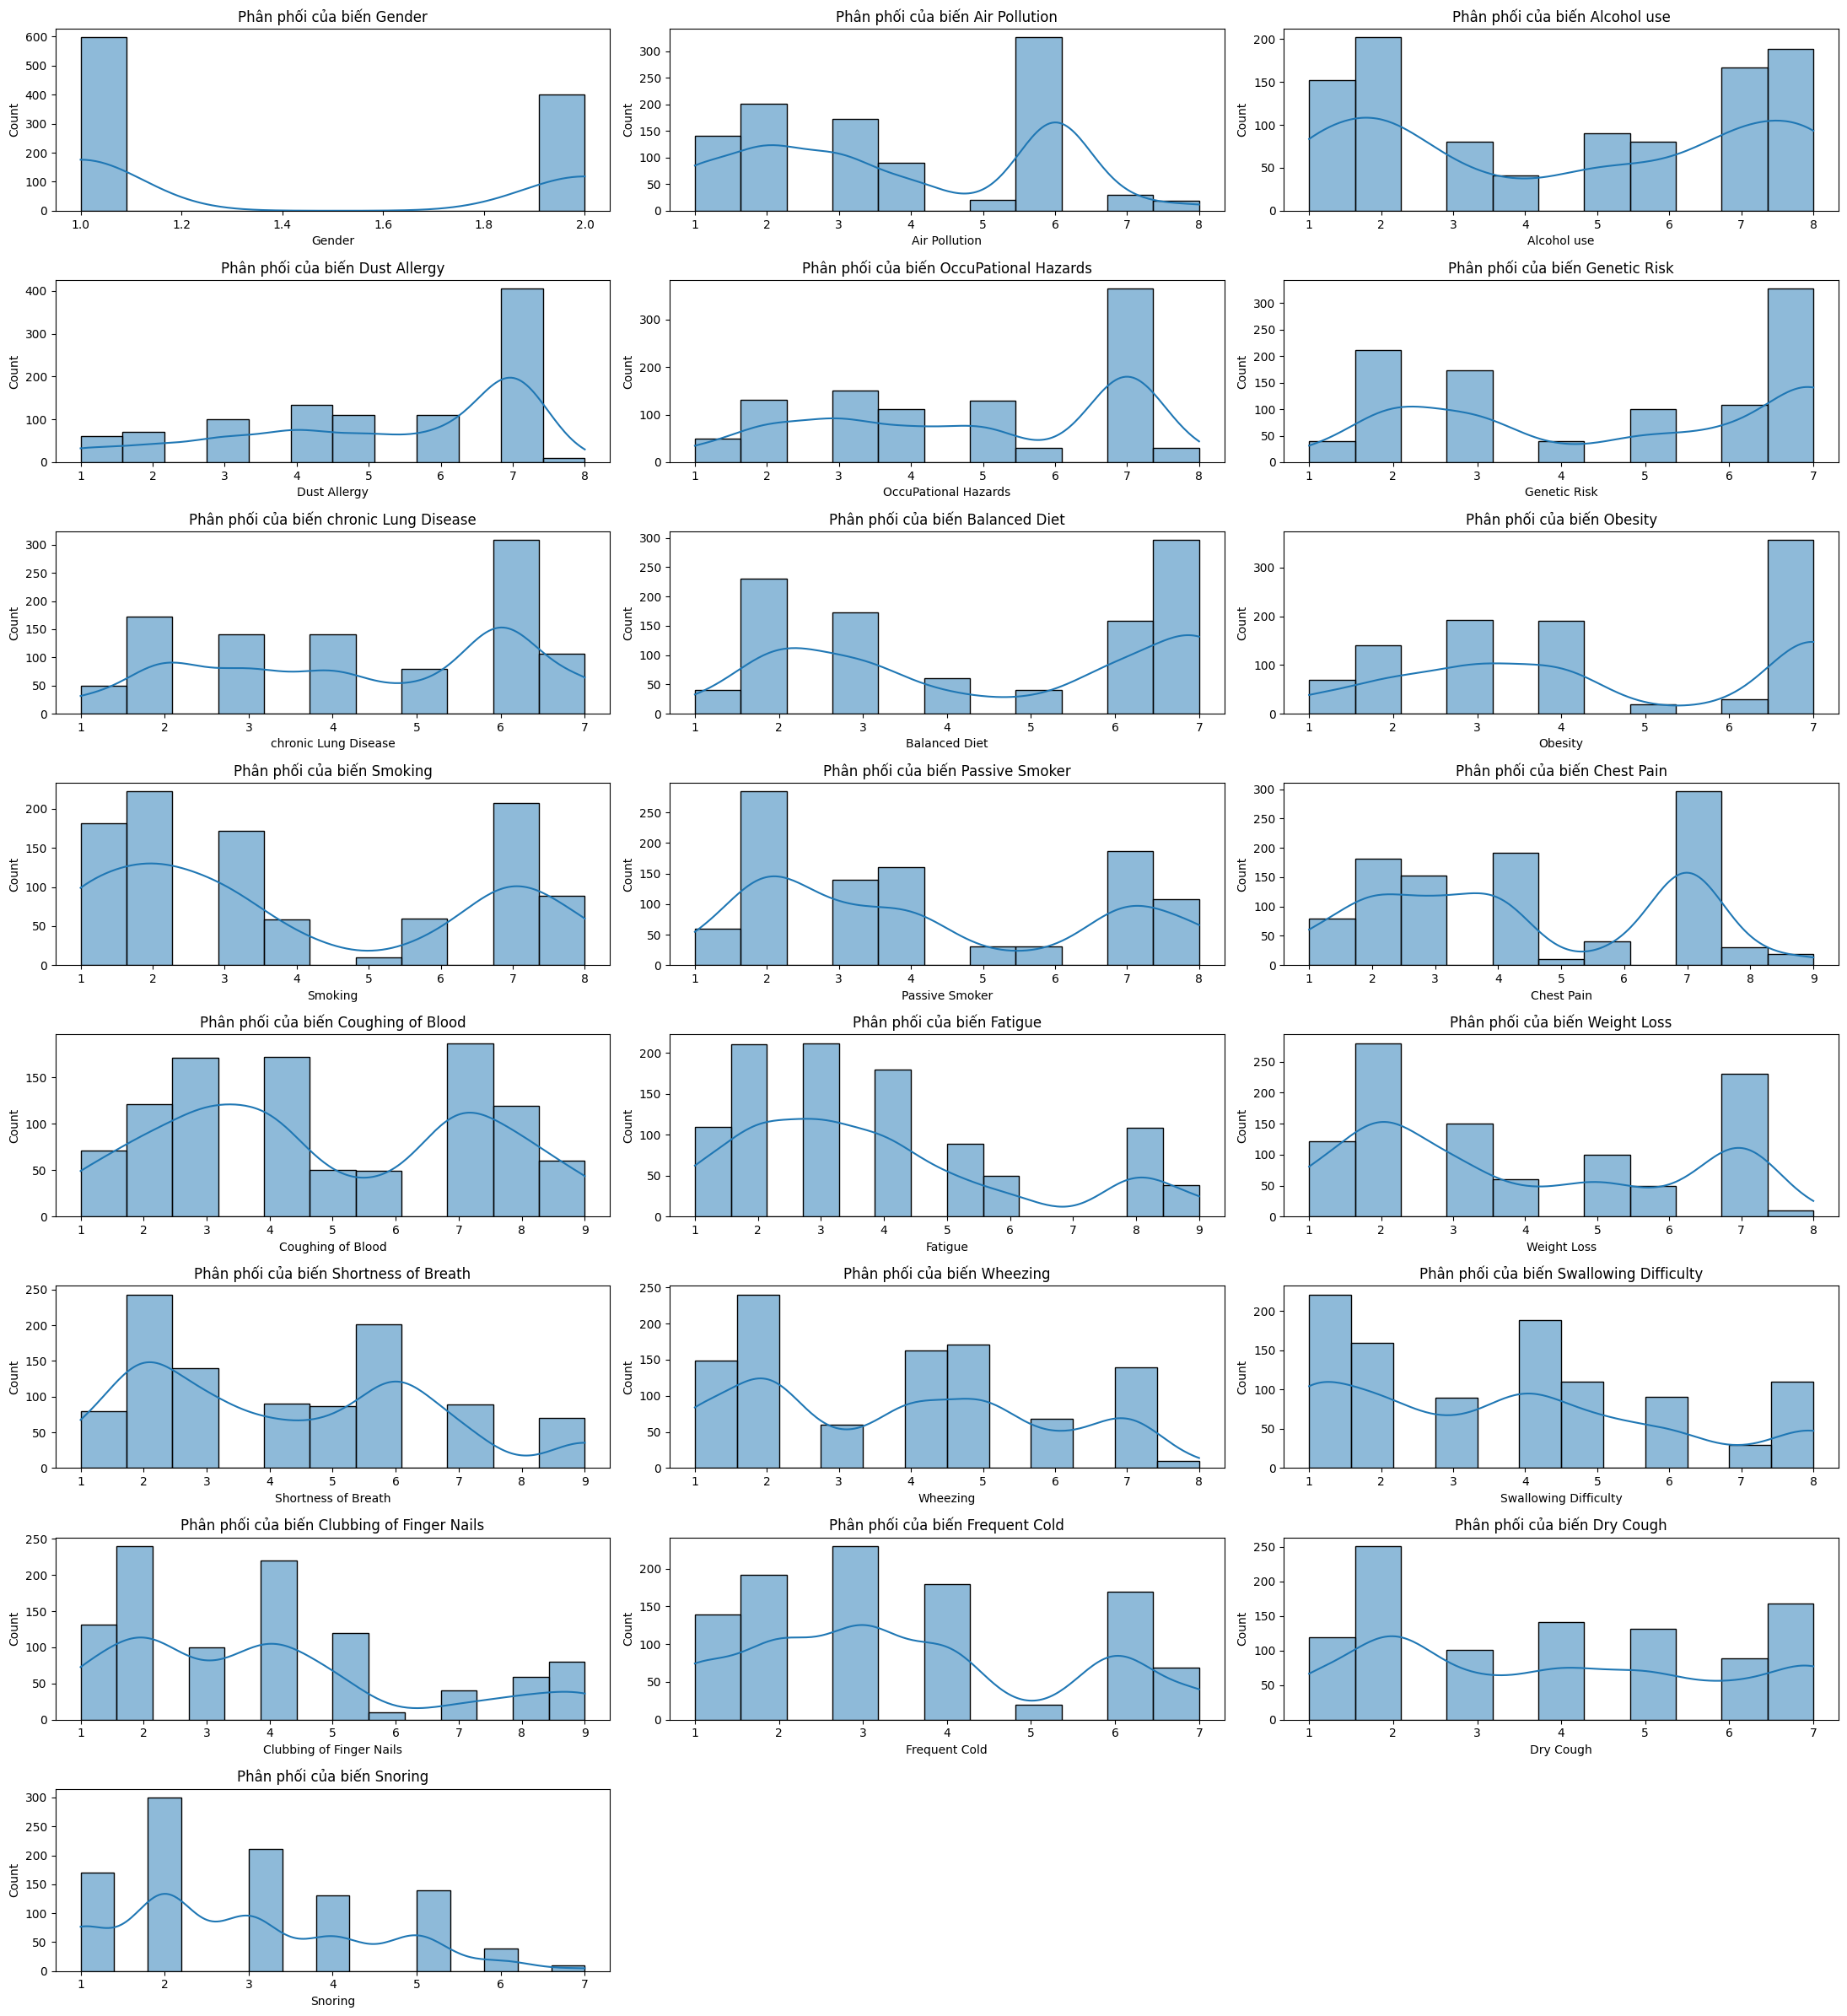

In [ ]:
cat_col = data.select_dtypes(['int', 'float']).columns.drop("Age Group", "Level")

cat_plots = len(cat_col)
rows = int(cat_plots / 3) + (cat_plots % 3 > 0)
cols = 3 if cat_plots > 3 else cat_plots

fig, axes = plt.subplots(rows, cols, figsize=(22, 24))
axes = axes.reshape(-1)

for i, ax in enumerate(axes):
    if i < len(cat_col):
        sns.histplot(data[cat_col[i]], kde=True, ax=ax)
        ax.set_title(f'Phân phối của biến {cat_col[i]}')
axes[-2].remove()
axes[-1].remove()
plt.tight_layout()
plt.show()

#**II. Trực quan biến mục tiêu**

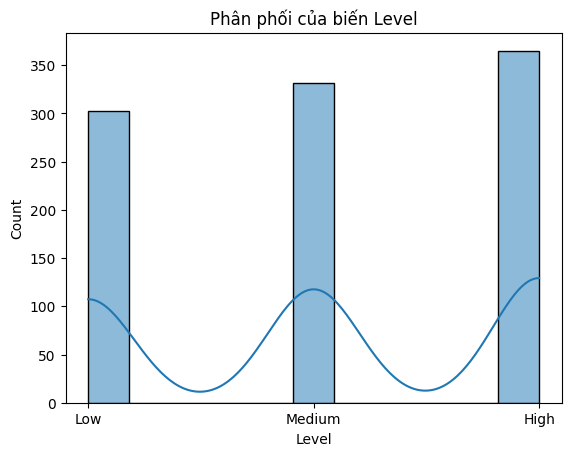

In [ ]:
tick_labels = ['Low', 'Medium', 'High']

# Vẽ histogram và
sns.histplot(data['Level'], kde=True)
plt.title('Phân phối của biến Level')
# Thay đổi tên các cột xuất hiện trên trục x
plt.gca().set_xticks([1, 2, 3])  # Đặt vị trí của ticks
plt.gca().set_xticklabels(tick_labels)  # Đặt nhãn cho ticks

plt.show()

# Trực quan tương quan với Target

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

Level   Low  Medium  High
Gender                   
Nam     149     197   252
Nữ      154     135   113


<Figure size 1400x1200 with 0 Axes>

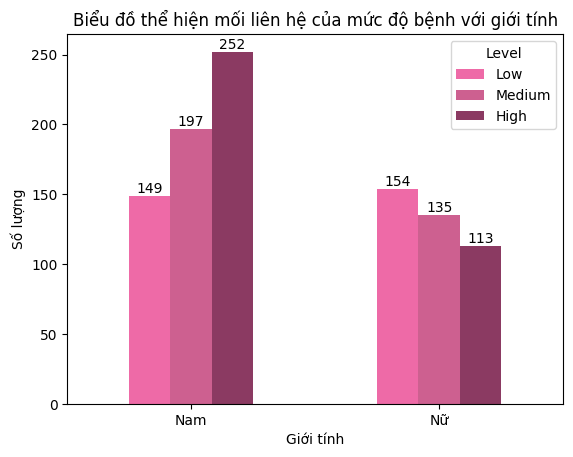

In [ ]:
data['Gender'] = data['Gender'].replace({1: 'Nam', 2: 'Nữ'})
data['Level'] = data['Level'].replace({1: 'Low', 2: 'Medium', 3: 'High'})
a = data['Gender']
b = data['Level']
cross = pd.crosstab(a, b)
cross = cross[['Low', 'Medium', 'High']]
print(cross)
plt.figure(figsize=(14, 12))

barplot = cross.plot.bar(color=[(238/255, 106/255, 167/255), (205/255, 96/255, 144/255), (139/255, 58/255, 98/255)], rot=0, legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center',
                     va='bottom',
                     fontsize=10,
                     color='black')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
level_order = data['Level'].unique()
plt.legend(title='Level', labels=level_order)

plt.title("Biểu đồ thể hiện mối liên hệ của mức độ bệnh với giới tính")

plt.show()


Level      Low  Medium  High
Age Group                   
14-28      117      59    74
29-43       60      98   110
44-58       63      91   101
59-73       63      84    80


<Figure size 1400x2000 with 0 Axes>

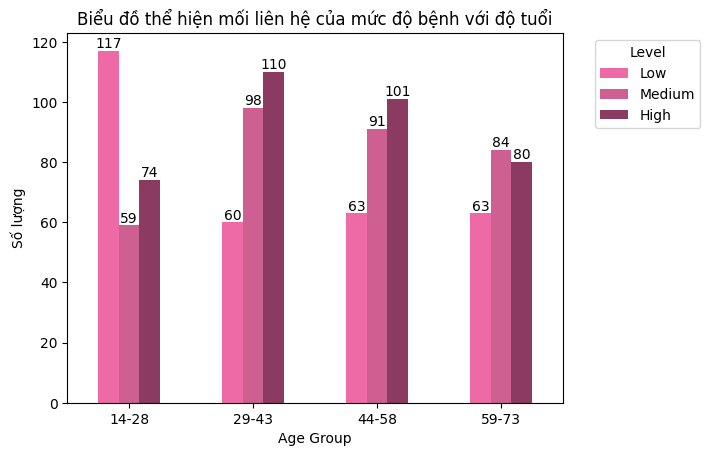

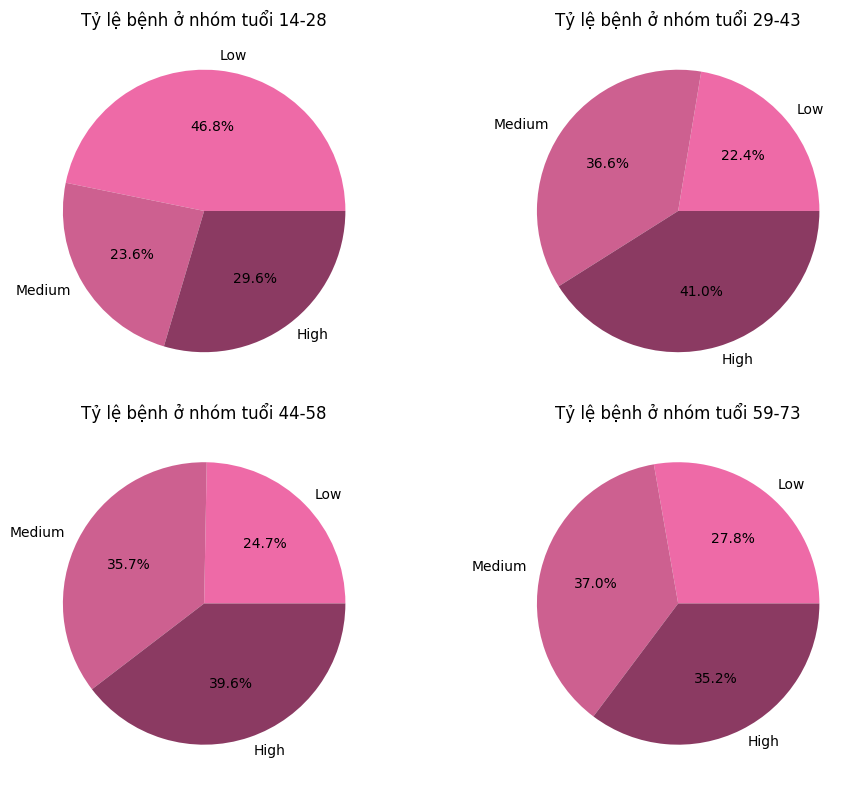

In [ ]:
data['Age Group'] = data['Age Group'].replace({1: '14-28', 2: '29-43', 3: '44-58', 4: '59-73'})
c = data['Age Group']
d = data['Level']

cross = pd.crosstab(c, d)
new_order = ['Low', 'Medium', 'High']
cross = cross[new_order]
print(cross)
plt.figure(figsize=(14, 20))

barplot = cross.plot.bar(color=[(238/255, 106/255, 167/255), (205/255, 96/255, 144/255), (139/255, 58/255, 98/255)], rot=0)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center',
                     va='bottom',
                     fontsize=10,
                     color='black')
level_order = data['Level'].unique()
plt.xlabel('Age Group')
plt.ylabel('Số lượng')
plt.legend(title='Level', labels=level_order , bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Biểu đồ thể hiện mối liên hệ của mức độ bệnh với độ tuổi")

plt.show()

cross['Total'] = cross.sum(axis=1)

colors = [(238/255, 106/255, 167/255), (205/255, 96/255, 144/255), (139/255, 58/255, 98/255)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    age_group = cross.index[i]

    low_percentage = cross.loc[age_group, 'Low'] / cross.loc[age_group, 'Total'] * 100
    medium_percentage = cross.loc[age_group, 'Medium'] / cross.loc[age_group, 'Total'] * 100
    high_percentage = cross.loc[age_group, 'High'] / cross.loc[age_group, 'Total'] * 100


    ax.pie([low_percentage, medium_percentage, high_percentage], labels=['Low', 'Medium', 'High'], autopct='%1.1f%%', colors=colors)
    ax.set_title(f'Tỷ lệ bệnh ở nhóm tuổi {age_group}')

plt.tight_layout()
plt.show()

#Tương quan giữa các biến

In [ ]:
data=data2

<function matplotlib.pyplot.show(close=None, block=None)>

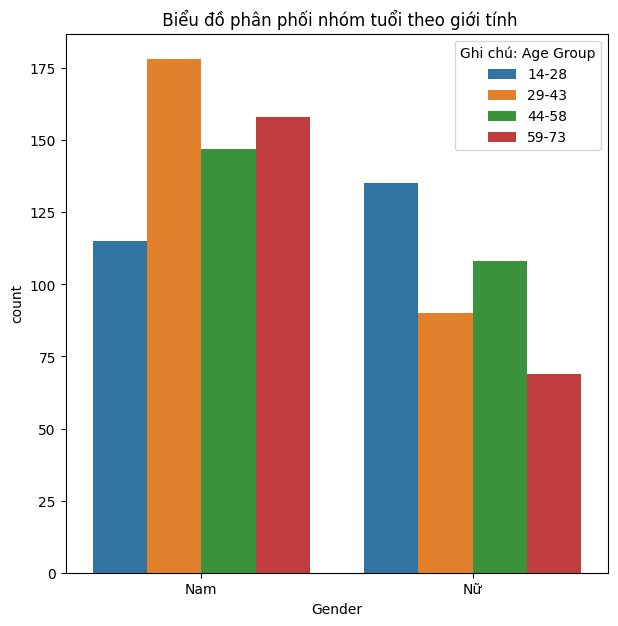

In [ ]:
df_gb = data.groupby(["Age Group","Gender"])["Level"].count().reset_index(name ="count")
fig, ax = plt.subplots(figsize = (7,7))
sns.barplot(data =df_gb, x ="Gender", y ="count", hue = "Age Group")

ax.set(title =" Biểu đồ phân phối nhóm tuổi theo giới tính",
       xlabel = "Gender",
       ylabel = "count")
# Lấy danh sách handles và labels từ chú thích hiện tại
handles, labels = ax.get_legend_handles_labels()

# Thay đổi nhãn của chú thích
new_labels = ['14-28', '29-43', '44-58', '59-73']
plt.legend(handles, new_labels, title='Ghi chú: Age Group')
# Thay đổi tên các cột xuất hiện trên trục x
tick_labels = ['Nam', 'Nữ']
plt.xticks(ticks=[0, 1], labels=tick_labels)
plt.show

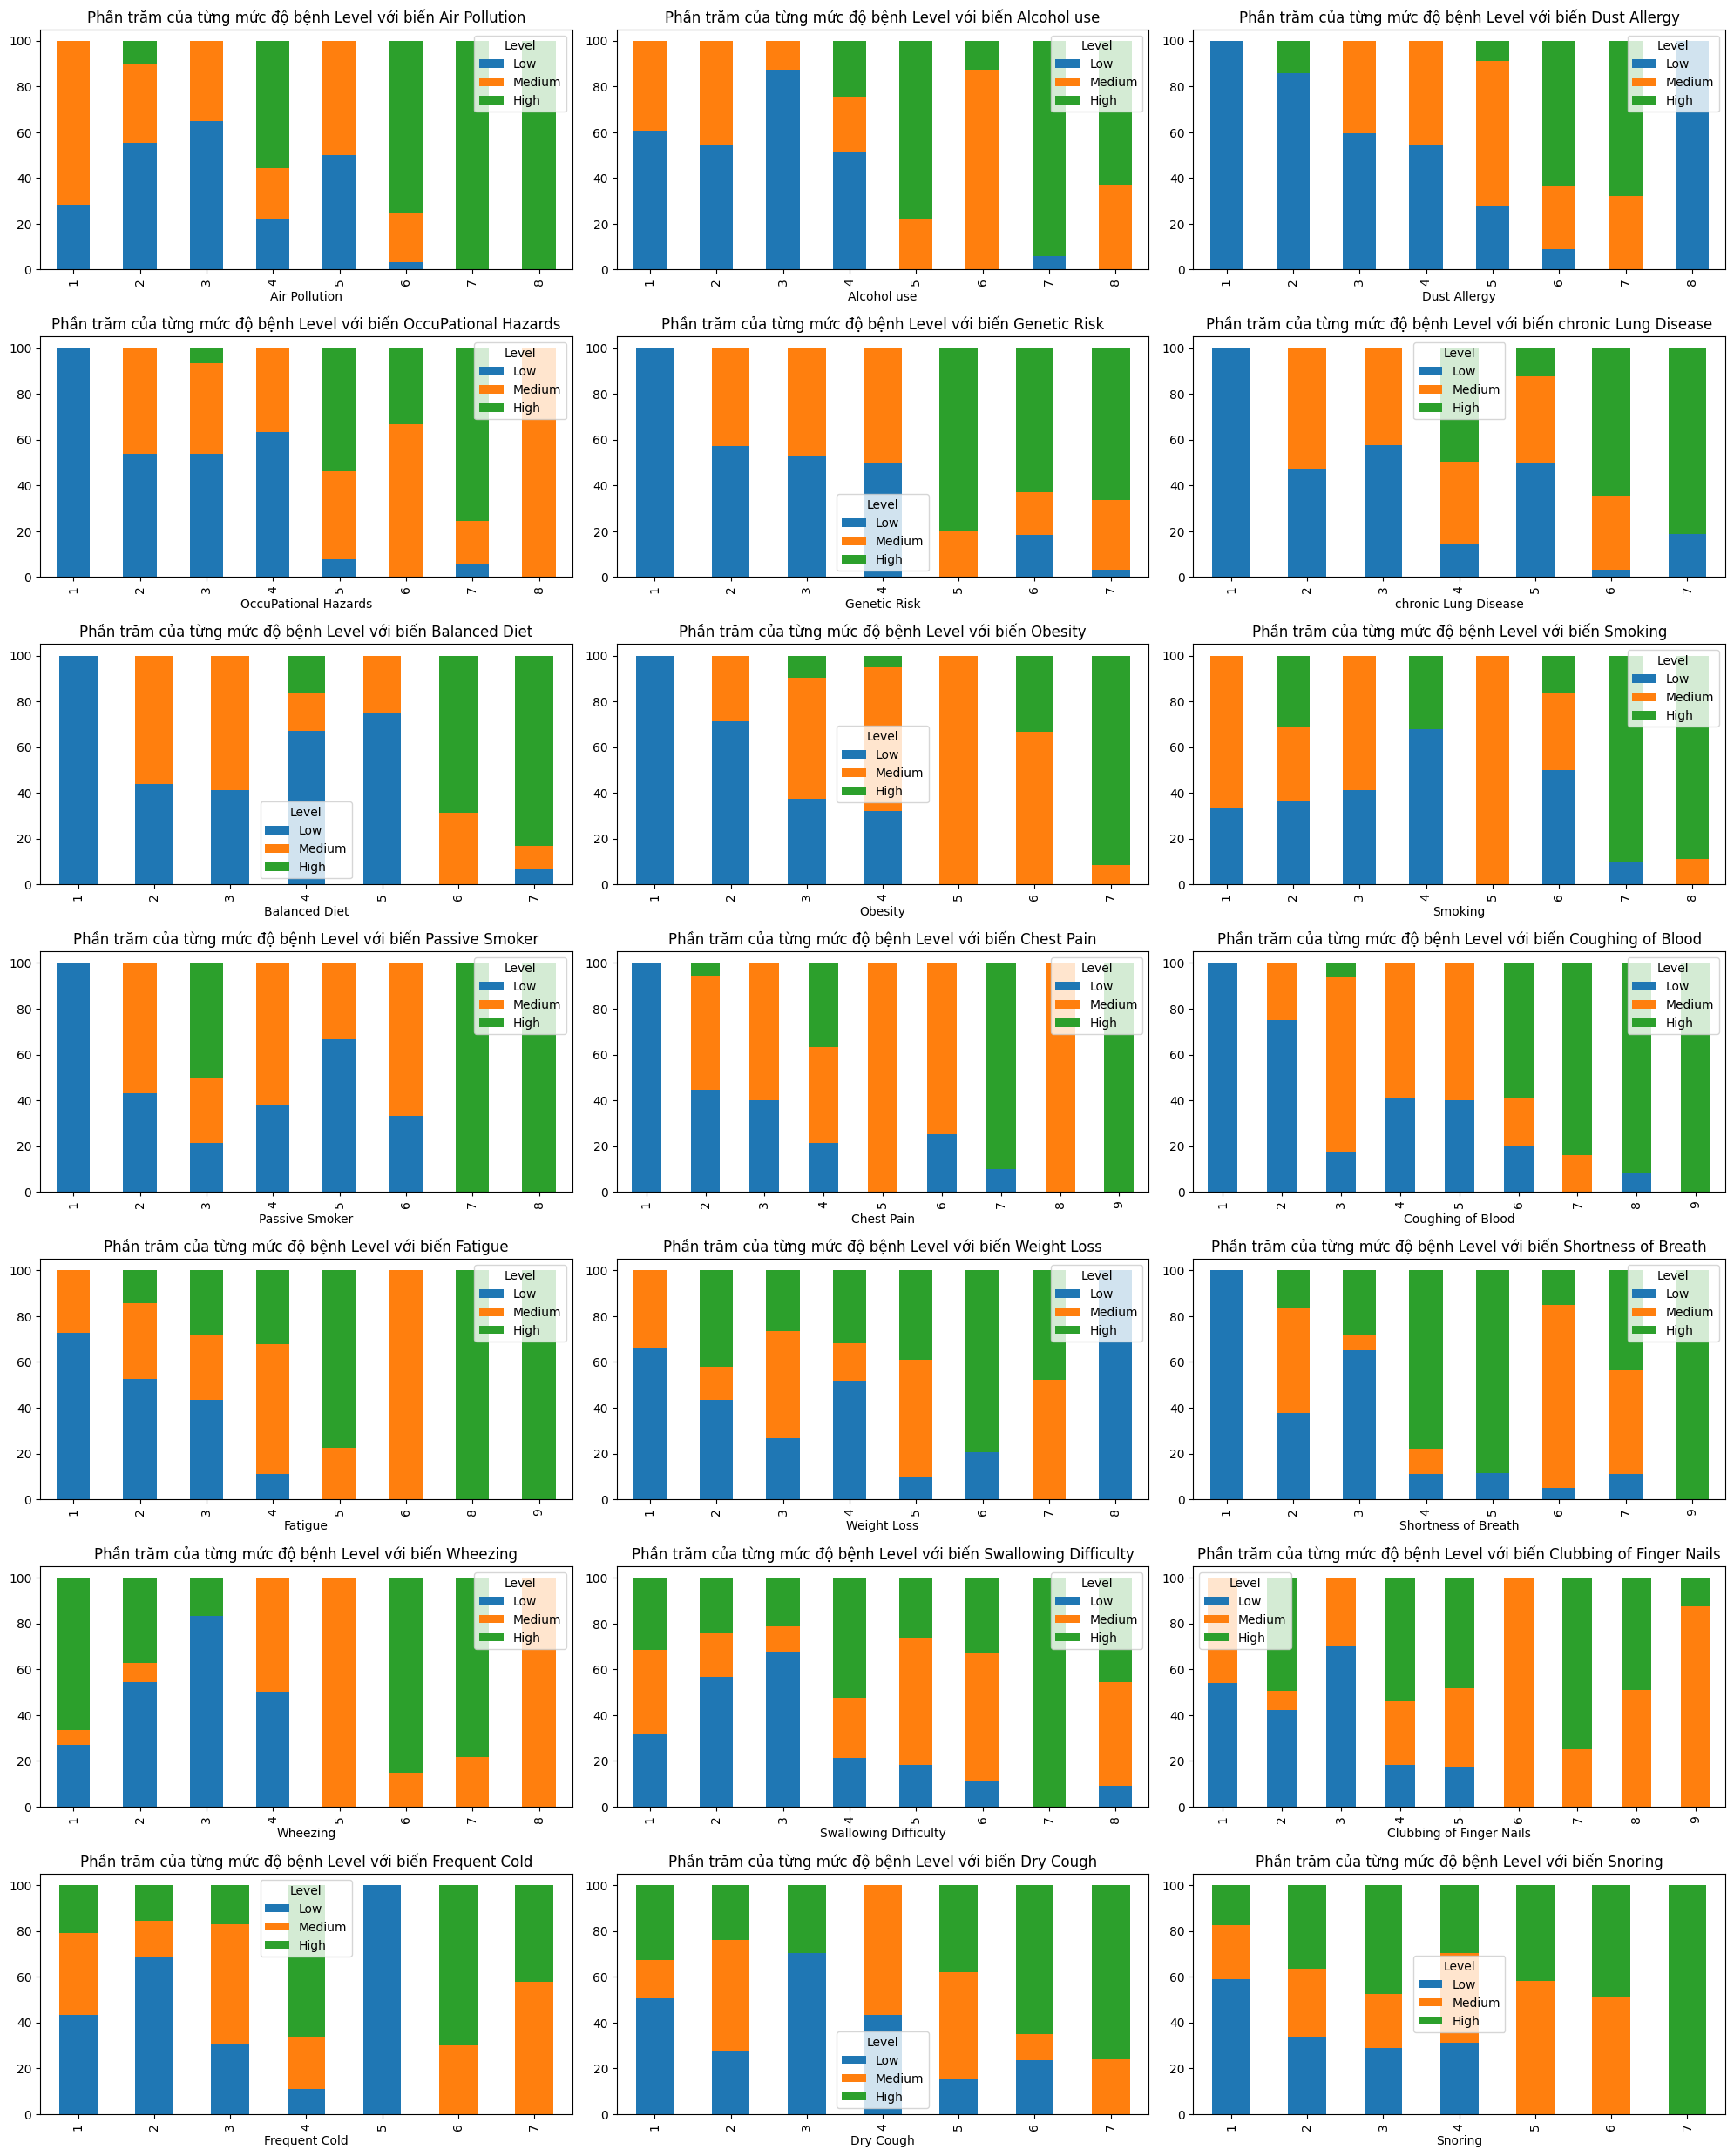

In [ ]:
columns2 = list(data.columns)
columns2.pop(0)
columns2.pop(0)
num_plots = len(columns2)
rows = int(num_plots / 3) + (num_plots % 3 > 0)
cols = 3 if num_plots > 3 else num_plots

fig, axes = plt.subplots(rows, cols, figsize=(20, 28))
axes = axes.reshape(-1)

for i, ax in enumerate(axes):
    if i < num_plots:
        df = data.groupby([columns2[i],'Level']).size().unstack(0).apply(lambda x: np.round(x*100/x.sum(), 2))
        df.T.plot(kind= 'bar',ax=ax,stacked= True)
        ax.set_title(f'Phần trăm của từng mức độ bệnh Level với biến {columns2[i]}')
        ax.legend(title='Level', labels=['Low', 'Medium','High'])
axes[-3].remove()
axes[-2].remove()
axes[-1].remove()
plt.tight_layout()
plt.show()


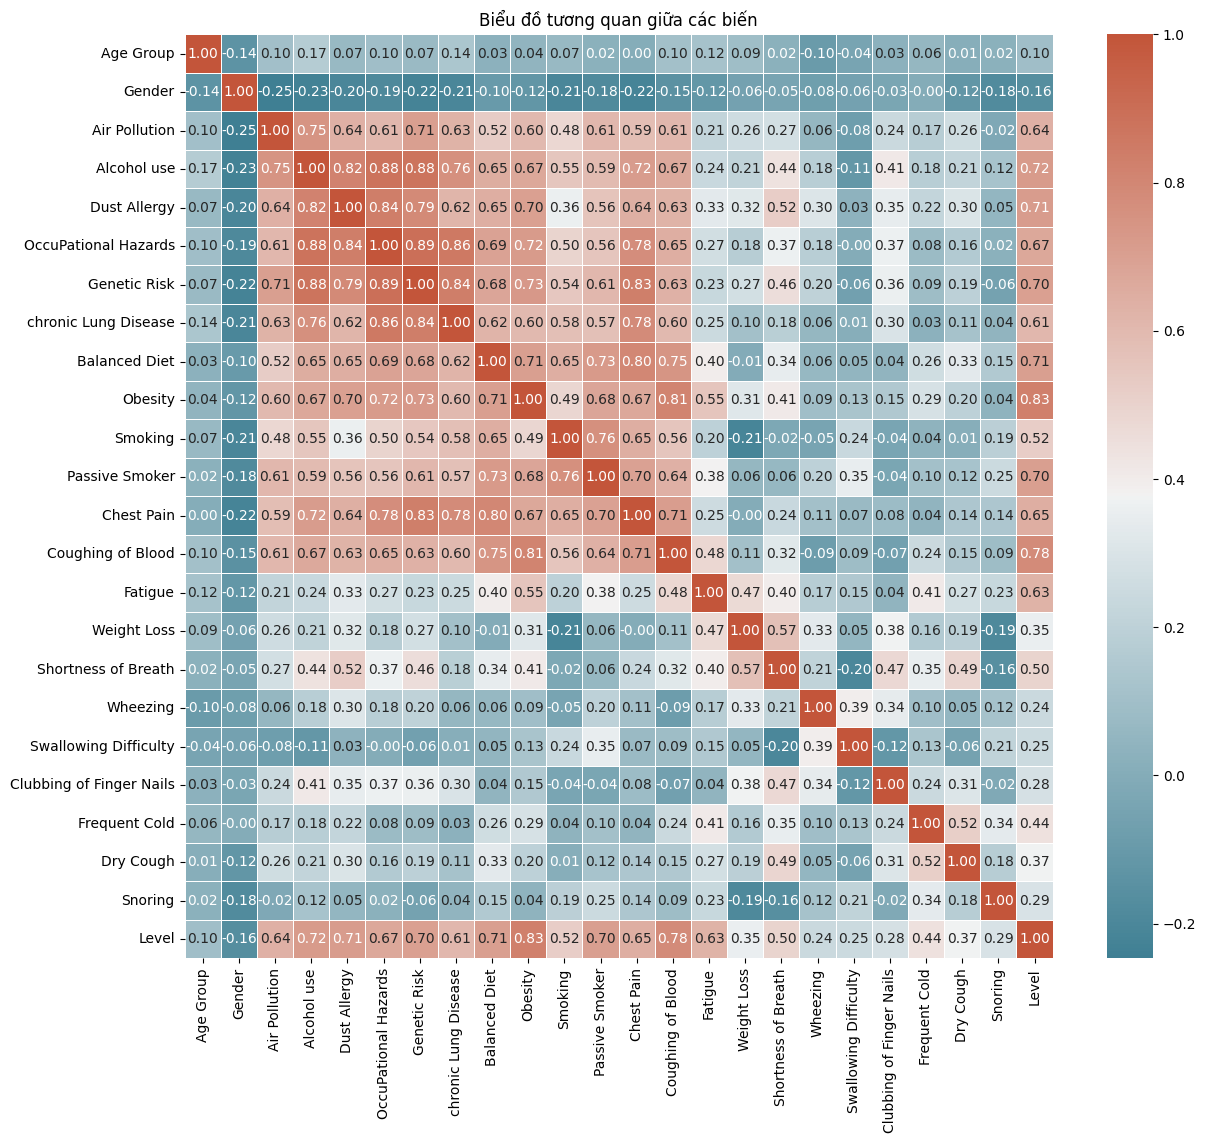

In [ ]:
correlation_matrix = data.corr()

cmap = sns.diverging_palette(220, 20, s=75, l=50, as_cmap=True)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Biểu đồ tương quan giữa các biến')
plt.show()

In [ ]:
correlation_matrix = data.corr()
lst_corr=[]
for col in correlation_matrix:
  row=0
  for j in correlation_matrix[col]:
    if j==1 :
      break
    if j >0.8:
      lst= [col,correlation_matrix.index[row],j]
      lst_corr.append(lst)
    row +=1
lst_corr.pop()
print(lst_corr)


[['Dust Allergy', 'Alcohol use', 0.8186435195099222], ['OccuPational Hazards', 'Alcohol use', 0.8787859206801721], ['OccuPational Hazards', 'Dust Allergy', 0.8358597714567234], ['Genetic Risk', 'Alcohol use', 0.8772098877053724], ['Genetic Risk', 'OccuPational Hazards', 0.8930485226784659], ['chronic Lung Disease', 'OccuPational Hazards', 0.8582838533909203], ['chronic Lung Disease', 'Genetic Risk', 0.8362308273811675], ['Chest Pain', 'Genetic Risk', 0.8317508263736857], ['Coughing of Blood', 'Obesity', 0.8148047650547877]]


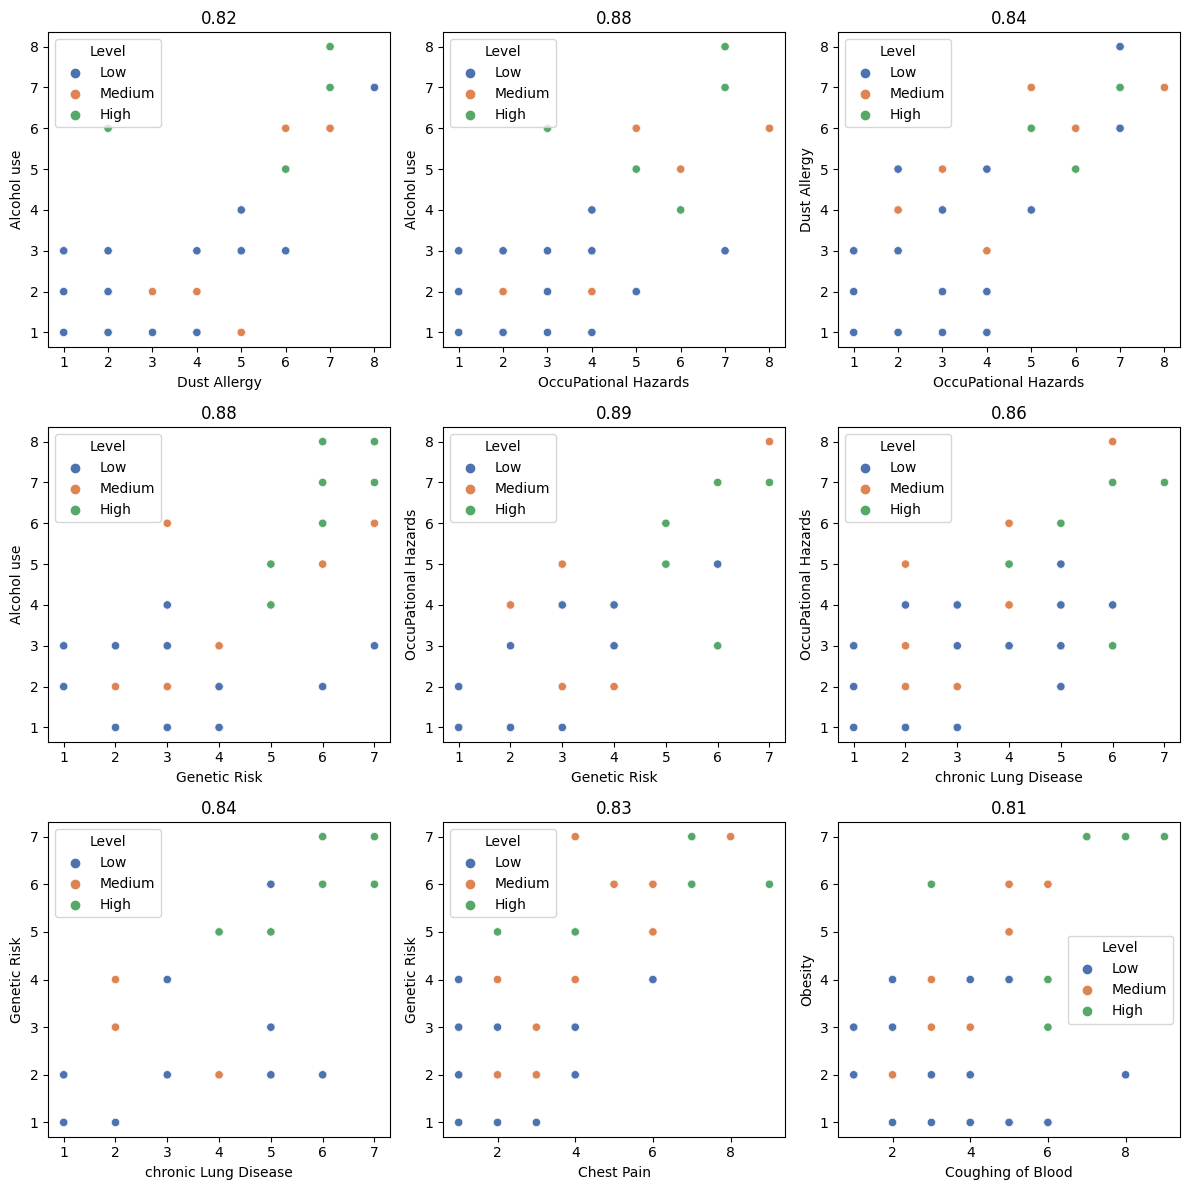

In [ ]:
map = {1:'Low', 2: 'Medium', 3: 'High'}
data['Level'] = data['Level'].map(map)
num_plots = len(lst_corr)
rows = int(num_plots / 3) + (num_plots % 3 > 0)
cols = 3 if num_plots > 3 else num_plots

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
  if i < len(lst_corr):
    sns.scatterplot(data=data, x=lst_corr[i][0],y=lst_corr[i][1],ax=ax, hue='Level', palette="deep")
    ax.set_title("%.2f" % lst_corr[i][2])
plt.tight_layout()
plt.show()

# TẠO BỘ DỮ LIỆU TRAIN, TEST

In [ ]:
data=data2

In [ ]:
X = data.drop('Level', axis =1)
y = data['Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 23) (800,)
(200, 23) (200,)


# PHÂN LỚP KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
## Xây dựng mô hình kNN Classification
from sklearn.neighbors       import KNeighborsClassifier
k   = int(pow(X_train.shape[0], 1/2) / 2)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)  # huấn luyện để tạo  mô hình
y_pred = knn.predict(X_test)


In [ ]:
#Ma trận nhầm lẫn
print("với k =", k)
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

# Đánh giá độ chính xác của mô hình
print(f'Accuracy ={accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision ={precision_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'recall ={recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score ={f1_score(y_test, y_pred,average="micro")*100:.2f}%')


với k = 14
Confusion Matrix:
 [[51  4  0]
 [ 0 63  0]
 [ 0  0 82]]
Accuracy =98.00%
Precision =98.00%
recall =98.00%
f1-score =98.00%


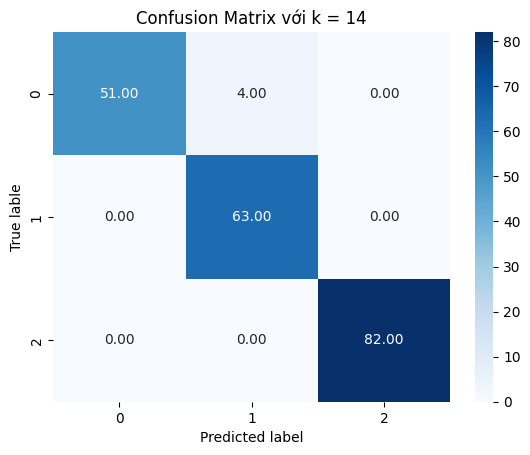

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title('Confusion Matrix với k = 14')
plt.show()

In [ ]:
# Xây dựng mô hình K-NN với k=int(pow(X_train.shape[0], 1/2) / 2) + 5
k1 =int(pow(X_train.shape[0], 1/2) / 2) + 5
knn1 = KNeighborsClassifier(n_neighbors = k1 )
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print("với k =", k1)
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

print(f'Accuracy ={accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision ={precision_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'recall ={recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score ={f1_score(y_test, y_pred,average="micro")*100:.2f}%')

với k = 19
Confusion Matrix:
 [[47  8  0]
 [ 1 61  1]
 [ 0  0 82]]
Accuracy =95.00%
Precision =95.00%
recall =95.00%
f1-score =95.00%


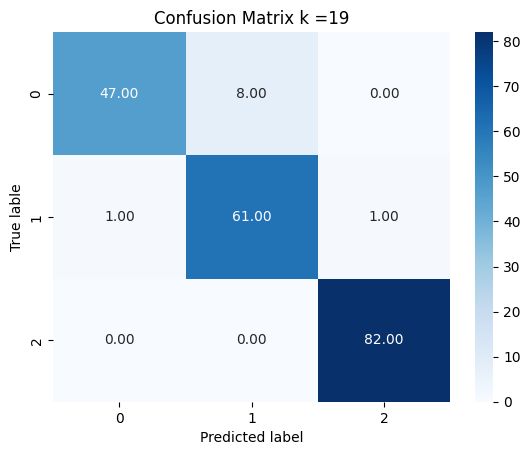

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title('Confusion Matrix k =19')
plt.show()

In [ ]:
# Xây dựng mô hình K-NN với k=int(pow(X_train.shape[0], 1/2) / 2) - 5
k2 = int(pow(X_train.shape[0], 1/2) / 2) - 5
knn2 = KNeighborsClassifier(n_neighbors = k2 )
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
print("với k =", k2)
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

print(f'Accuracy ={accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision ={precision_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'recall ={recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score ={f1_score(y_test, y_pred,average="micro")*100:.2f}%')

với k = 9
Confusion Matrix:
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
Accuracy =100.00%
Precision =100.00%
recall =100.00%
f1-score =100.00%


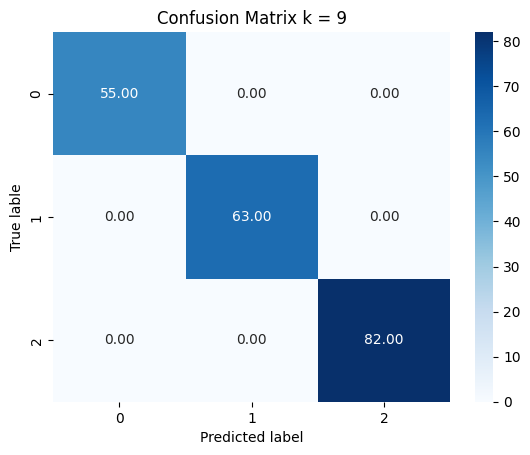

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title("Confusion Matrix k = 9")
plt.show()

# PHÂN LỚP Decision Tree

In [ ]:
import pydotplus         as pdp
from IPython.display         import Image
from sklearn                 import tree
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier

In [ ]:
## Xây dựng mô hình Decision Tree
clf   = DecisionTreeClassifier(criterion='entropy')
model = clf.fit(X, y) # huấn luyện để tạo  mô hình


# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

print(f'Accuracy ={accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision ={precision_score(y_test, y_pred,average= "micro")*100:.2f}%')
print(f'recall ={recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score ={f1_score(y_test, y_pred,average="micro")*100:.2f}%')

Confusion Matrix:
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
Accuracy =100.00%
Precision =100.00%
recall =100.00%
f1-score =100.00%


# PHÂN LỚP SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


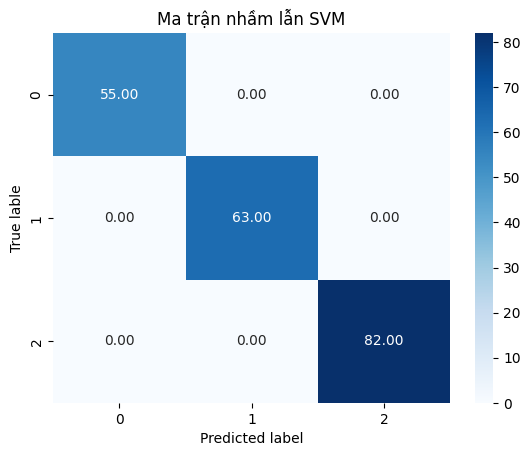

In [ ]:
# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title('Ma trận nhầm lẫn SVM')
plt.show()

In [ ]:
# Đánh giá độ chính xác của mô hình
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(f'Accuracy = {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision = {(precision_score(y_test, y_pred,average="micro"))*100:.2f}%')
print(f'recall = {recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score = {f1_score(y_test, y_pred,average="micro")*100:.2f}%')

Accuracy = 100.00%
Precision = 100.00%
recall = 100.00%
f1-score = 100.00%


# PHÂN LỚP NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbayes=GaussianNB()
nbayes.fit(X_train, y_train)
y_pred = nbayes.predict(X_test)
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Accuracy = {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision = {(precision_score(y_test, y_pred,average="micro"))*100:.2f}%')
print(f'recall = {recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score = {f1_score(y_test, y_pred,average="micro")*100:.2f}%')

Confusion Matrix:
 [[47  6  2]
 [ 0 53 10]
 [ 0  3 79]]
Accuracy = 89.50%
Precision = 89.50%
recall = 89.50%
f1-score = 89.50%


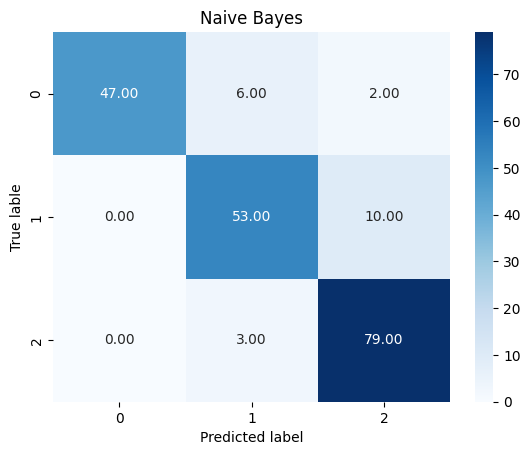

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title('Naive Bayes')
plt.show()

# ĐÁNH GIÁ CÁC MÔ HÌNH

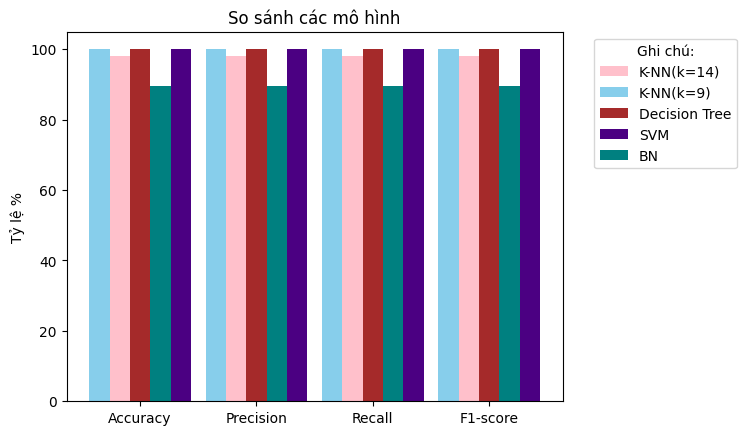

In [ ]:
KNN_k_14 = [98, 98, 98, 98]
KNN_k_9 = (100, 100, 100, 100)
Decision_Tree = (100, 100, 100, 100)
SVM = (100, 100, 100, 100)
BN = (89.5, 89.5, 89.5, 89.5)

ind = np.arange(len(KNN_k_14))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(
    ind - width / 2, KNN_k_14, width / 2, color="pink", label="K-NN(k=14)"
)
rects2 = ax.bar(
    ind - width, KNN_k_9, width / 2, color="skyblue", label="K-NN(k=9)"
)
rects3 = ax.bar(
    ind, Decision_Tree, width / 2, color="brown", label="Decision Tree"
)
rects4 = ax.bar(
    ind + width, SVM, width / 2, color="indigo", label="SVM"
)
rects5 = ax.bar(
    ind + width / 2, BN, width / 2, color="teal", label="BN"
)

ax.set_ylabel("Tỷ lệ %")
ax.set_title("So sánh các mô hình")
ax.set_xticks(ind)
ax.set_xticklabels(("Accuracy", "Precision", "Recall", "F1-score"))
ax.legend(loc="lower center")
plt.legend(title="Ghi chú:", bbox_to_anchor=(1.05, 1))
plt.show()

# GIẢM CHIỀU DỮ LIỆU

<Axes: >

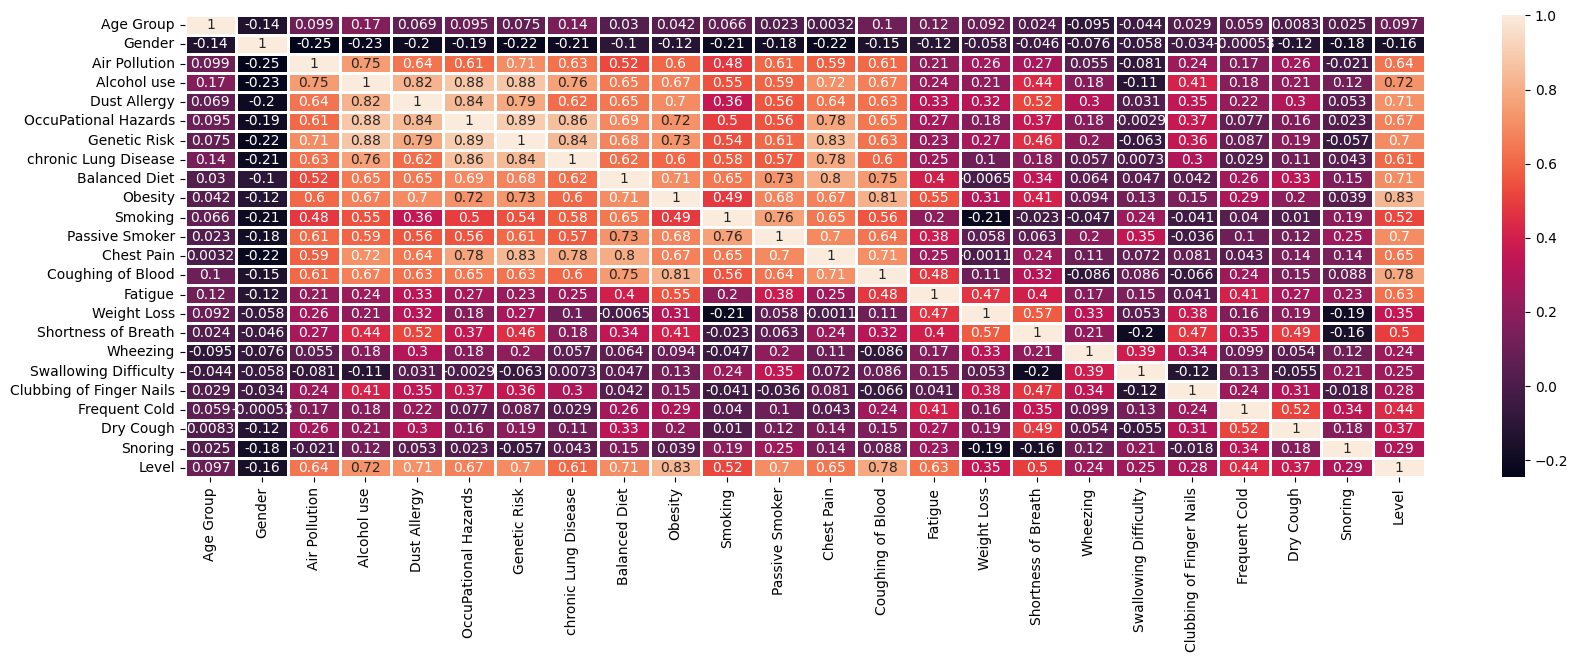

In [ ]:
plt.subplots(figsize = (20,6))
sns.heatmap(data.corr(),linewidth = 1, annot = True)

In [ ]:
data = data.drop(['Alcohol use', 'OccuPational Hazards', 'Genetic Risk', 'Obesity'], axis=1)

<ipython-input-143-0dfe1da05047>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidth = 1, annot = True)


<Axes: >

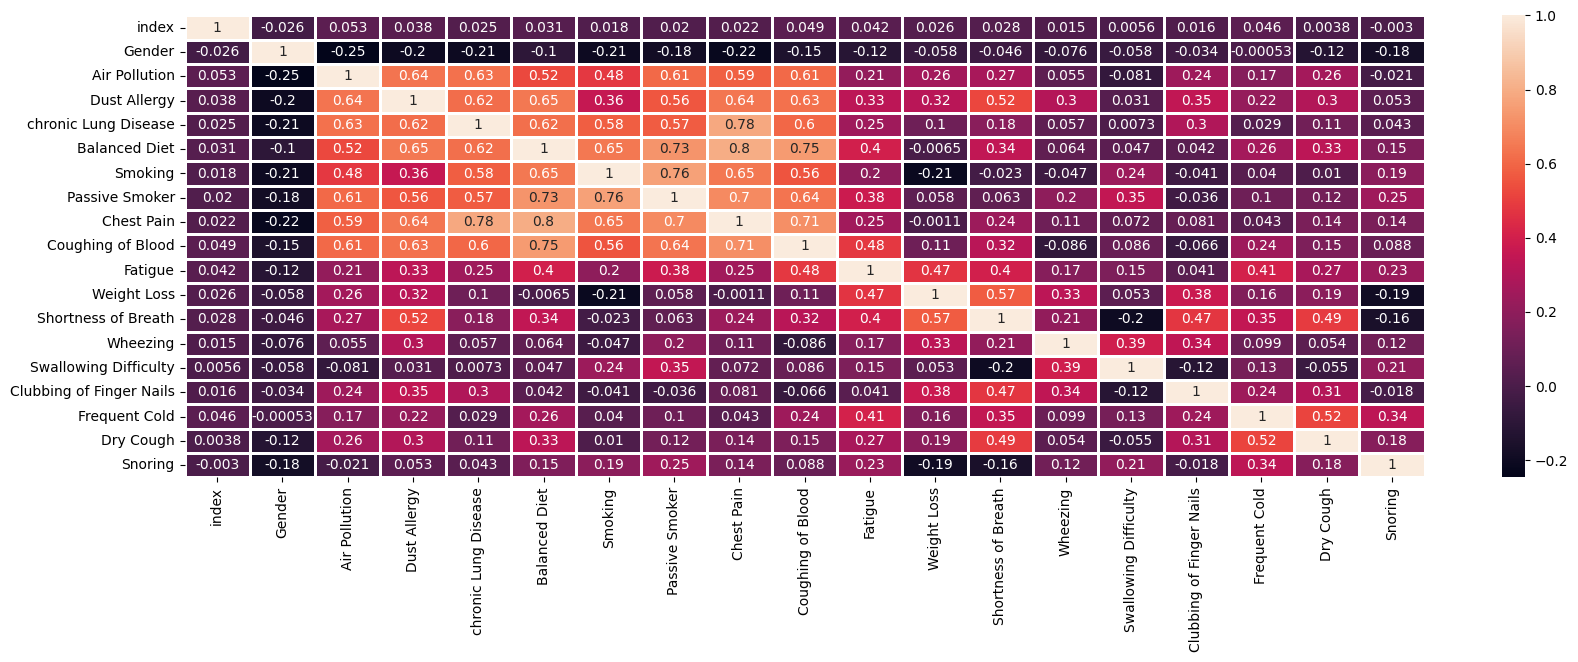

In [ ]:
plt.subplots(figsize = (20,6))
sns.heatmap(data.corr(),linewidth = 1, annot = True)

In [ ]:
# Áp dụng mô hình Decision Tree
X = data.drop('Level', axis = 1)
y = data.Level

## Chia tập dữ liệu thành training, test sets theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [ ]:
clf   = DecisionTreeClassifier(criterion='entropy')
model = clf.fit(X, y)

y_pred = model.predict(X_test)

In [ ]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

print(f'Accuracy ={accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision ={precision_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'recall ={recall_score(y_test, y_pred,average="micro")*100:.2f}%')
print(f'f1-score ={f1_score(y_test, y_pred,average="micro")*100:.2f}%')

Confusion Matrix:
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
Accuracy =100.00%
Precision =100.00%
recall =100.00%
f1-score =100.00%


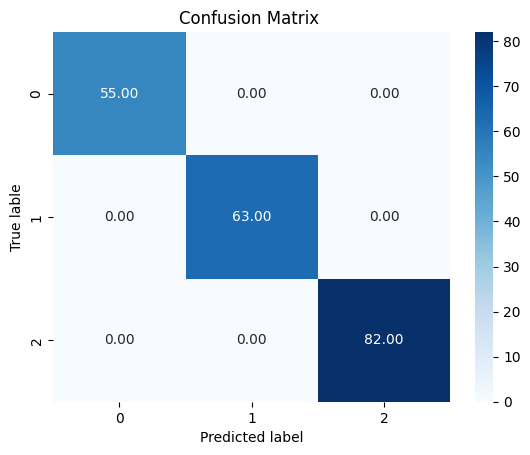

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True lable')
plt.title('Confusion Matrix ')
plt.show()